## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

In [58]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [59]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

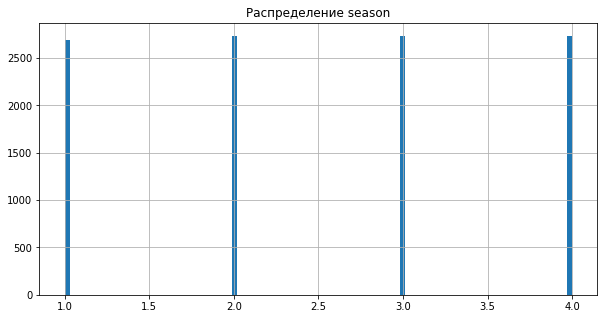

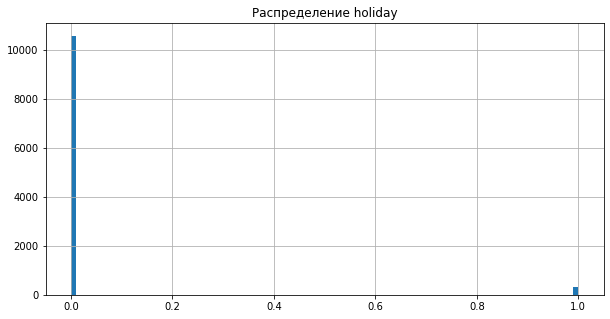

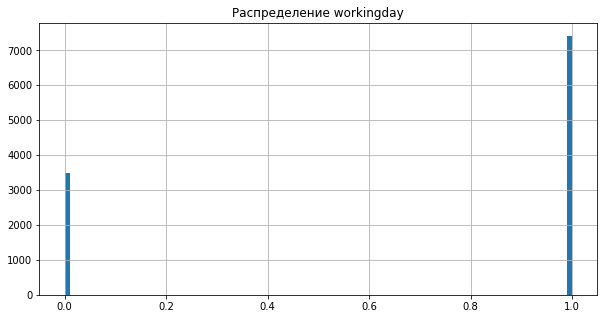

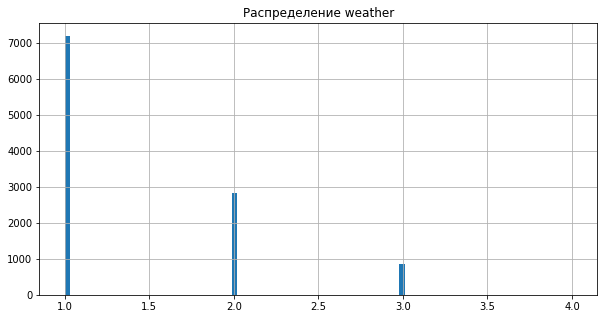

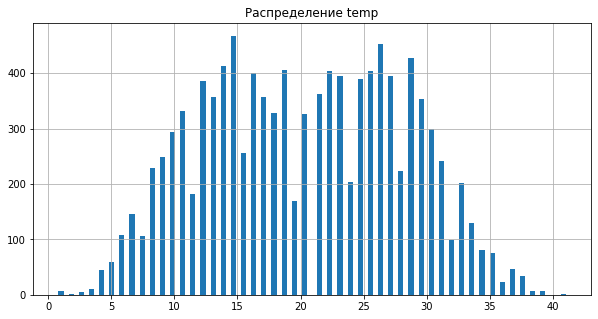

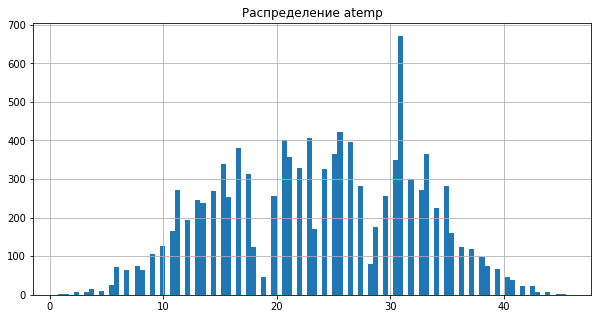

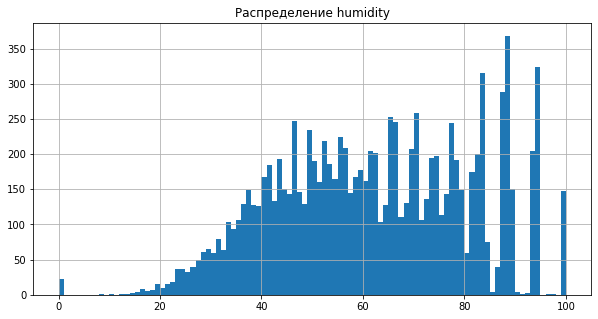

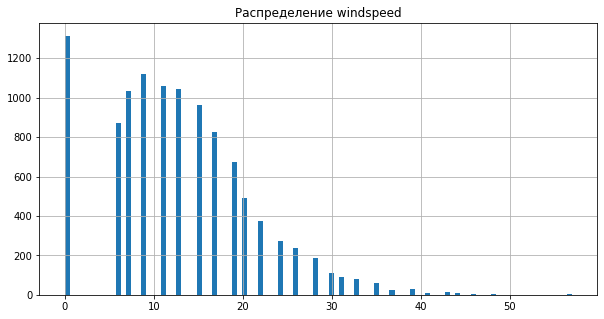

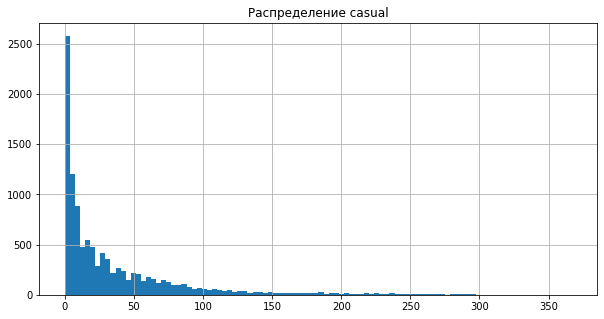

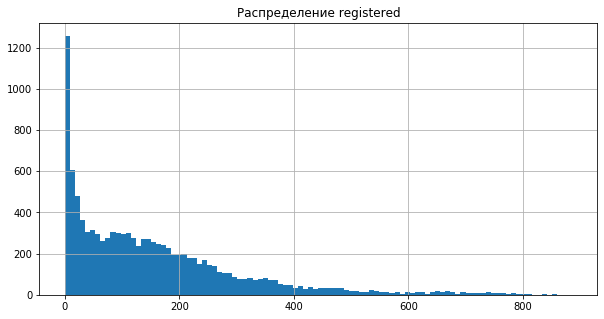

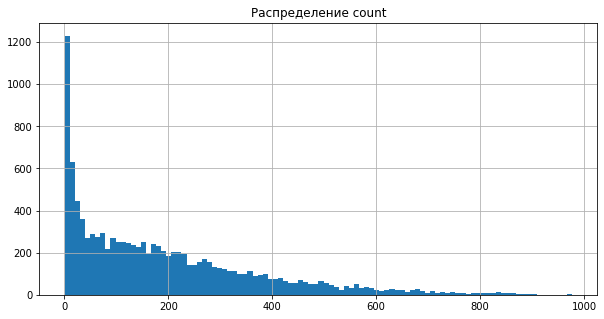

In [60]:
for i in df.columns:
    df[i].hist(bins = 100)
    plt.title("Распределение {}".format(i))
    plt.show()

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [66]:
for i in df.columns:
    print("Метрика: {}".format(i))
    print("------------------------------------")
    print("Среднее: {}".format(df[i].mean()))
    print("50 перцентиль: {}".format(np.percentile(df[i], 50)))
    print("75 перцентиль: {}".format(np.percentile(df[i], 75)))
    print("99 перцентиль: {}".format(np.percentile(df[i], 99)))
    print("Максимум: {}".format(df[i].max()))
    print("Мода (5 популярных значений):")
    print(df[i].value_counts().nlargest(5))
    print("------------------------------------\n\n")

Метрика: season
------------------------------------
Среднее: 2.5066139996325556
50 перцентиль: 3.0
75 перцентиль: 4.0
99 перцентиль: 4.0
Максимум: 4
Мода (5 популярных значений):
4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
------------------------------------


Метрика: holiday
------------------------------------
Среднее: 0.02856880396839978
50 перцентиль: 0.0
75 перцентиль: 0.0
99 перцентиль: 1.0
Максимум: 1
Мода (5 популярных значений):
0    10575
1      311
Name: holiday, dtype: int64
------------------------------------


Метрика: workingday
------------------------------------
Среднее: 0.6808745177291935
50 перцентиль: 1.0
75 перцентиль: 1.0
99 перцентиль: 1.0
Максимум: 1
Мода (5 популярных значений):
1    7412
0    3474
Name: workingday, dtype: int64
------------------------------------


Метрика: weather
------------------------------------
Среднее: 1.418427337865148
50 перцентиль: 1.0
75 перцентиль: 2.0
99 перцентиль: 3.0
Максимум: 4
Мода (5 популярных 

### Аномалии замечены в нескольких метриках

Метрики casual, registered, и как следствие, count выражены ассиметричным распределением. Учитывая отсутствие отрицательных показателей, показатели моды, близкие к нулю, прогрессивный рост от 50 до 99 перцентилей, данные метрики имеют длинный хвост вправо.

В метрике погоды (weather) скорее всего можно привести данные к трем типам, так как 4-ый тип погоды встретился за 2 года всего один раз.

В распределении температур (temp, atemp) приведены значения с сотыми и тысячными. При этом расстояния имеют определенный крупный шаг. Это говорит о том, что замеры температуры скорее всего проводились по другой шкале, и только потом были переведены в градусы по Цельсию. Странным выглядит отстутствие температуры комфорта (в районе 21 градуса по Цельсию) в метрике temp. В метрике atemp замечен аномальный выброс со значением в 31.060 градуса по Цельсию, который примерно на 40% превышает следующие за ним по популярности значения.

На графике скорости ветра (windspeed) и по показателям моды виден провал в показателях между 0 и 7 м/с. Показатели моды (5 самых популярных) по количеству высоки (каждый встречается более 1000 раз), при этом выражены с точностью до десятитысячных, что является не естесственным при условиях наличия данных в менее 11 тысяч строк. Возможно также как и в метриках с температурой замеры производились по другой шкале.

Показатель влажности (humidity) не может равняться нулю (возможно 0 присваивается в случае отсутствия измерений) и редко может подниматься выше 85%, тем не менее 3 и 5 самых популярных значений превышают этот показатель. Также встречается показатель в 100%. Либо эта метрика имеет другое назначение, либо это просто невозможно в природе. Данные и производные показатели (среднее, дисперсия, 50, 75 и 99 перцентили, мода и тд) повреждены, что может привести к неверному толкованию их в дальнейшем.

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [18]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [20]:
for i in df.columns:
    print("Метрика {}".format(i))
    print("------------------------------------")
    print("Среднее {}".format(df[i].mean()))
    print("50 перцентиль {}".format(np.percentile(df[i], 50)))
    print("75 перцентиль {}".format(np.percentile(df[i], 75)))
    print("99 перцентиль {}".format(np.percentile(df[i], 99)))
    print("Мода (5 популярных значений)")
    print(df[i].value_counts().nlargest(5))
    print("------------------------------------")
    print("Эксцесс ", kurtosis(df[i]))
    print("Ассиметрия ", skew(df[i]))
    print("------------------------------------\n\n")



Метрика season
------------------------------------
Среднее 2.5066139996325556
50 перцентиль 3.0
75 перцентиль 4.0
99 перцентиль 4.0
Мода (5 популярных значений)
4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
------------------------------------
Эксцесс  -1.3555899543299803
Ассиметрия  -0.007074695296526289
------------------------------------


Метрика holiday
------------------------------------
Среднее 0.02856880396839978
50 перцентиль 0.0
75 перцентиль 0.0
99 перцентиль 1.0
Мода (5 популярных значений)
0    10575
1      311
Name: holiday, dtype: int64
------------------------------------
Эксцесс  30.032624417535125
Ассиметрия  5.6597371332540805
------------------------------------


Метрика workingday
------------------------------------
Среднее 0.6808745177291935
50 перцентиль 1.0
75 перцентиль 1.0
99 перцентиль 1.0
Мода (5 популярных значений)
1    7412
0    3474
Name: workingday, dtype: int64
------------------------------------
Эксцесс  -1.3977369782030475


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [29]:
max([[df[i].std()**2, i] for i in df.columns])

[32813.31315347224, 'count']

In [25]:
for i in df.columns:
    print("Метрика {}".format(i))
    print("Дисперсия {}".format(df[i].std()**2))
    print("------------------------------------")

Метрика season
Дисперсия 1.2458450888401458
------------------------------------
Метрика holiday
Дисперсия 0.027755177029477718
------------------------------------
Метрика workingday
Дисперсия 0.21730437065606648
------------------------------------
Метрика weather
Дисперсия 0.4017513528731466
------------------------------------
Метрика temp
Дисперсия 60.70887229692924
------------------------------------
Метрика atemp
Дисперсия 71.81885577841805
------------------------------------
Метрика humidity
Дисперсия 370.3713058480327
------------------------------------
Метрика windspeed
Дисперсия 66.65966976133899
------------------------------------
Метрика casual
Дисперсия 2496.04921936629
------------------------------------
Метрика registered
Дисперсия 22812.789514322714
------------------------------------
Метрика count
Дисперсия 32813.31315347224
------------------------------------


Count - метрика с самой большой дисперсией

In [30]:
interval = stats.norm.interval(0.95, loc = df['count'].mean(), scale = df['count'].std())
interval

(-163.46247359398893, 546.6107374190854)

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [32]:
upper_level = df['count'].mean() + 3 * df['count'].std()
lower_level = df['count'].mean() - 3 * df['count'].std()

In [33]:
upper_level

735.007493403403

In [34]:
lower_level

-351.8592295783066

In [49]:
df[(df['count'] > upper_level) | (df['count'] < lower_level)]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6658,1,0,1,1,28.70,31.820,28,6.0032,140,642,782
6659,1,0,1,1,28.70,31.820,32,0.0000,102,647,749
6683,1,0,1,1,27.06,31.060,44,19.0012,98,648,746
6779,1,0,1,1,26.24,31.060,57,16.9979,120,681,801
6849,2,0,1,1,25.42,30.305,17,12.9980,123,634,757
...,...,...,...,...,...,...,...,...,...,...,...
9935,4,0,1,1,18.86,22.725,82,16.9979,31,803,834
9944,4,0,1,2,23.78,27.275,64,22.0028,102,788,890
9945,4,0,1,2,22.96,26.515,64,22.0028,68,720,788
10519,4,0,1,1,21.32,25.000,59,15.0013,43,700,743


In [48]:
len(df[(df['count'] > upper_level) | (df['count'] < lower_level)])

147

In [51]:
for i in df.columns:
    print("Метрика {}".format(i))
    print("Дисперсия {}".format(len(df[(df[i] >= df[i].mean() + 3 * df[i].std()) | (df[i] <= df[i].mean() - 3 * df[i].std())])))
    print("------------------------------------")

Метрика season
Дисперсия 0
------------------------------------
Метрика holiday
Дисперсия 311
------------------------------------
Метрика workingday
Дисперсия 0
------------------------------------
Метрика weather
Дисперсия 1
------------------------------------
Метрика temp
Дисперсия 0
------------------------------------
Метрика atemp
Дисперсия 0
------------------------------------
Метрика humidity
Дисперсия 22
------------------------------------
Метрика windspeed
Дисперсия 67
------------------------------------
Метрика casual
Дисперсия 292
------------------------------------
Метрика registered
Дисперсия 235
------------------------------------
Метрика count
Дисперсия 147
------------------------------------


Больше всего аномалий получилось в holiday (311), casual (292), registered (235)

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [55]:
import seaborn as sns

In [35]:
corr_matrix = df.corr()
corr_matrix

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


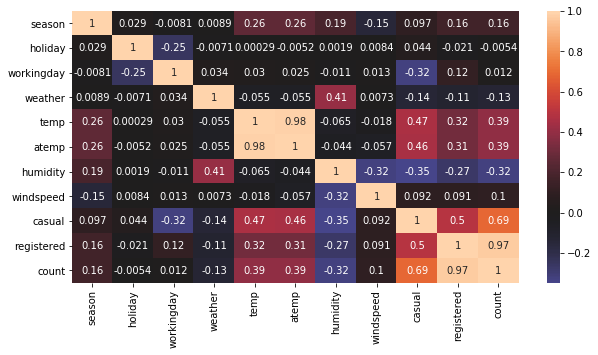

In [38]:
sns.heatmap(corr_matrix, center = 0, annot = True)

### Есть сильные прямые связи
По шкале Чеддока весьма высокая связь между общим количеством посетителей (count) и зарегистрированными участниками (registered). А также почти сильная, но все же заметная с обычными участниками (casual). Есть умеренно-заметная связь (0.5) между зарегистрированными и обычными уастниками. Логично, что с ростом числа участников обычно растет их же количество в виде зарегистрированных и незарегистрированных пользователей. Пропорции при росте не имеют существенных изменений, при этом обычных участников в общем разрезе гораздо меньше.

Есть еще одна весьма высокая прямая зависимость между temp и atemp. Возможно речь идет о температуре воздуха и воды (воздуха снаружи и воздуха в неотапливаемом помещении и тд).

Также замечена тенденция, что с ростом температуры в разрезе пользователей больше становится незарегистрированных участников. Это скорее всего объясняется спонтанным желанием людей арендовать велосипед в хорошую погоду (импульсная покупка).

Прямая связь между влажностью (humidity) и типом погоды (weather - выражено четыремя типами, и это не четыре сезона - за нее отвечает метрика season) находится на уровне 0.41 по шкале Чеддока. Можно предположить, что здесь отражено повышение влажности воздуха при осадках (скорее всего это 3-ий тип, 4-ый встретился всего лишь однажды).

Коэффициент корреляции 0.6904135653286745


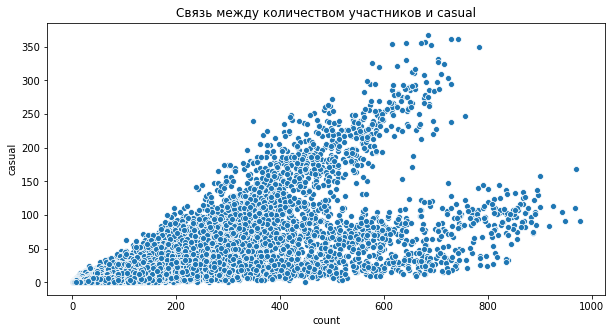

Коэффициент корреляции 0.9709481058098277


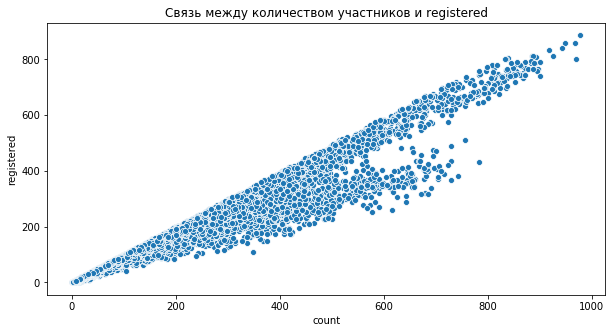

In [54]:
level = 0.5
for i in df.columns[:-1]:
    curr_corr = df[i].corr(df['count'])
    if abs(curr_corr) >= level:
        sns.scatterplot(x = "count", y = i, data = df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между количеством участников и " + str(i))
        plt.show()

Коэффициент корреляции 0.9849481104817069


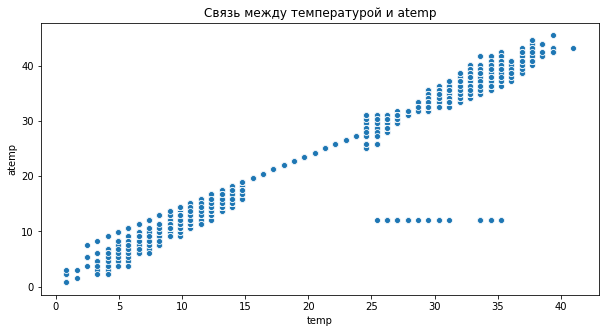

In [55]:
level = 0.5
for i in df.columns.difference(['temp']):
    curr_corr = df[i].corr(df['temp'])
    if abs(curr_corr) >= level:
        sns.scatterplot(x = "temp", y = i, data = df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между температурой и " + str(i))
        plt.show()

Коэффициент корреляции 0.4062436513120973


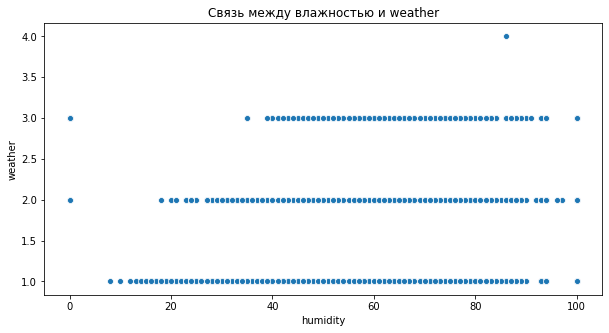

In [56]:
level = 0.4
for i in df.columns.difference(['humidity']):
    curr_corr = df[i].corr(df['humidity'])
    if abs(curr_corr) >= level:
        sns.scatterplot(x = "humidity", y = i, data = df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между влажностью и " + str(i))
        plt.show()